In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the DATA SET


In this notebook, I developed a model aimed at predicting flight delays at the Destination Airport. The purpose is to create a Data set which can be used for visualization and model Building so as to predict the Delays of Flights. I did the visualization so as to get better inferences about the data. For, model fitting I have seperated the Dataset into training Data and Testing Data so that prediction can be done on the testing Data. I also showed how to import Tableau and make visualization more crisp and clear.

Technical aspect Covered:

visualization: matplolib, seaborn, Tableau

data manipulation: pandas, numpy

modeling: sklearn, scipy

class definition: regression, figure, Boosting, Bagging

For EDA I used some part of Python coding and Tableau Visulization so as to get a brief insight and inference from the data. Various Plots are created so as to get a great idea of whats happening in the Dataset and what is the most important variable affecting the dalays of the airlines. Feature scaling is a method used to normalize the range of independent variables or features of data and this concept is used.



In [2]:
data = pd.read_csv("flights.csv")

In [3]:
airport = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
YEAR                   1048575 non-null int64
MONTH                  1048575 non-null int64
DAY                    1048575 non-null int64
DAY_OF_WEEK            1048575 non-null int64
AIRLINE                1048575 non-null object
FLIGHT_NUMBER          1048575 non-null int64
TAIL_NUMBER            1040825 non-null object
ORIGIN_AIRPORT         1048575 non-null object
DESTINATION_AIRPORT    1048575 non-null object
SCHEDULED_DEPARTURE    1048575 non-null int64
DEPARTURE_TIME         1009060 non-null float64
DEPARTURE_DELAY        1009060 non-null float64
TAXI_OUT               1008346 non-null float64
WHEELS_OFF             1008346 non-null float64
SCHEDULED_TIME         1048573 non-null float64
ELAPSED_TIME           1005504 non-null float64
AIR_TIME               1005504 non-null float64
DISTANCE               1048575 non-null int64
WHEELS_ON              1007279 non-null f

In [5]:
data.shape

(1048575, 31)

The Data Contains 31 columns and 1048575 Rows

In [6]:
data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.009060e+06,1.009060e+06,1.008346e+06,1.008346e+06,...,1.048575e+06,1.007279e+06,1.005504e+06,1.048575e+06,1.048575e+06,228528.000000,228528.000000,228528.000000,228528.000000,228528.000000
mean,2015.0,1.694297e+00,1.382097e+01,3.953196e+00,2.256759e+03,1.322632e+03,1.333705e+03,1.133485e+01,1.665380e+01,1.357382e+03,...,1.504820e+03,1.492204e+03,7.612191e+00,2.426150e-03,3.864960e-02,13.692554,0.057328,18.203577,22.921458,3.545277
std,0.0,7.051508e-01,8.725656e+00,1.999436e+00,1.799166e+03,4.707748e+02,4.827415e+02,3.922372e+01,1.007006e+01,4.830351e+02,...,4.865613e+02,5.071090e+02,4.209367e+01,4.919620e-02,1.927585e-01,25.524897,1.779647,46.323146,41.888498,23.611555
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-6.100000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.200000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.000000e+00,6.000000e+00,2.000000e+00,7.550000e+02,9.200000e+02,9.280000e+02,-5.000000e+00,1.100000e+01,9.440000e+02,...,1.120000e+03,1.115000e+03,-1.200000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,2.000000e+00,1.300000e+01,4.000000e+00,1.725000e+03,1.319000e+03,1.329000e+03,-1.000000e+00,1.400000e+01,1.342000e+03,...,1.524000e+03,1.521000e+03,-3.000000e+00,0.000000e+00,0.000000e+00,4.000000,0.000000,2.000000,4.000000,0.000000
75%,2015.0,2.000000e+00,2.100000e+01,6.000000e+00,3.485000e+03,1.720000e+03,1.731000e+03,1.100000e+01,1.900000e+01,1.745000e+03,...,1.915000e+03,1.917000e+03,1.200000e+01,0.000000e+00,0.000000e+00,19.000000,0.000000,18.000000,29.000000,0.000000
max,2015.0,3.000000e+00,3.100000e+01,7.000000e+00,9.794000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.359000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,830.000000,241.000000,1971.000000,1313.000000,1152.000000


In [7]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1048570,2015,3,10,2,EV,4122,N11191,RDU,EWR,1013,...,1133.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048571,2015,3,10,2,UA,1018,N79279,LGA,IAH,1013,...,1335.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048572,2015,3,10,2,UA,1260,N76508,SAN,ORD,1013,...,1627.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048573,2015,3,10,2,EV,4349,N14158,MSY,ORD,1013,...,1229.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048574,2015,3,10,2,MQ,2916,N539MQ,CID,ORD,1013,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN


In [9]:
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


From the above table it is clear that data is not properly organised and date is given seperated and many columns have unnecessary data not useful for visualization for which it is required that we clean the data and take only those columns which is of our use.

In [10]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [11]:
airport = airport.dropna(subset = ['LATITUDE','LONGITUDE'])

In [12]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [13]:
airport.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [14]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [15]:
Data_NULL = data.isnull().sum()*100/data.shape[0]
Data_NULL

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.739098
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          3.768448
DEPARTURE_DELAY         3.768448
TAXI_OUT                3.836540
WHEELS_OFF              3.836540
SCHEDULED_TIME          0.000191
ELAPSED_TIME            4.107575
AIR_TIME                4.107575
DISTANCE                0.000000
WHEELS_ON               3.938297
TAXI_IN                 3.938297
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            3.938297
ARRIVAL_DELAY           4.107575
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    96.135040
AIR_SYSTEM_DELAY       78.205851
SECURITY_DELAY         78.205851
AIRLINE_DELAY          78.205851
LATE_AIRCRAFT_DELAY    78.205851
WEATHER_DE

We can see that 96% of the values in Cancellation reason column are null for which it is of less use while predicting Delays. Some other columns include 78.2% in Air System Delay, Security Delay, Airline Delay, Weather Delay etc. So I am going to create two Dataset which is having no null values one is by removing all the null values irrespective of different types of Delays and other I am going to take the data set with respect to different types of delays. The first Dataset is named as Flights and the other one is named as Flight_Delays.

In [16]:
# Dropping of subset of null values
data1 = data.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
             'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [17]:
data1.shape

(1005504, 31)

In [18]:
data1.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    1005504
AIR_SYSTEM_DELAY        776976
SECURITY_DELAY          776976
AIRLINE_DELAY           776976
LATE_AIRCRAFT_DELAY     776976
WEATHER_DELAY           776976
dtype: int64

In [19]:
# Creting Dataset w.r.t different Types of Delays
data11 = data1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
data11 = data11.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)

In [20]:
data11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228528 entries, 27 to 1048569
Data columns (total 14 columns):
AIRLINE                228528 non-null object
ORIGIN_AIRPORT         228528 non-null object
DESTINATION_AIRPORT    228528 non-null object
DEPARTURE_DELAY        228528 non-null float64
TAXI_OUT               228528 non-null float64
ELAPSED_TIME           228528 non-null float64
DISTANCE               228528 non-null int64
TAXI_IN                228528 non-null float64
ARRIVAL_DELAY          228528 non-null float64
AIR_SYSTEM_DELAY       228528 non-null float64
SECURITY_DELAY         228528 non-null float64
AIRLINE_DELAY          228528 non-null float64
LATE_AIRCRAFT_DELAY    228528 non-null float64
WEATHER_DELAY          228528 non-null float64
dtypes: float64(10), int64(1), object(3)
memory usage: 26.2+ MB


In [21]:
# The other Dataset
Flight_Delays = data11

In [22]:
# Creating Dataset by removing null values by not focussing fully on different types of Delays
data2 = data1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [23]:
data2.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [24]:
data2.shape

(1005504, 25)

In [25]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005504 entries, 0 to 1048573
Data columns (total 25 columns):
YEAR                   1005504 non-null int64
MONTH                  1005504 non-null int64
DAY                    1005504 non-null int64
DAY_OF_WEEK            1005504 non-null int64
AIRLINE                1005504 non-null object
FLIGHT_NUMBER          1005504 non-null int64
TAIL_NUMBER            1005504 non-null object
ORIGIN_AIRPORT         1005504 non-null object
DESTINATION_AIRPORT    1005504 non-null object
SCHEDULED_DEPARTURE    1005504 non-null int64
DEPARTURE_TIME         1005504 non-null float64
DEPARTURE_DELAY        1005504 non-null float64
TAXI_OUT               1005504 non-null float64
WHEELS_OFF             1005504 non-null float64
SCHEDULED_TIME         1005504 non-null float64
ELAPSED_TIME           1005504 non-null float64
AIR_TIME               1005504 non-null float64
DISTANCE               1005504 non-null int64
WHEELS_ON              1005504 non-null f

In [26]:
data2.DEPARTURE_TIME.isnull().sum()

0

In [27]:
data2.DEPARTURE_TIME.dtype

dtype('float64')

In [28]:
data2.DEPARTURE_TIME

0          2354.0
1             2.0
2            18.0
3            15.0
4            24.0
5            20.0
6            19.0
7            44.0
8            19.0
9            33.0
10           24.0
11           27.0
12           35.0
13           34.0
14           39.0
15           41.0
16           31.0
17           42.0
18           46.0
19           45.0
20          120.0
21           52.0
22          102.0
23          103.0
24          102.0
25          112.0
26          107.0
27          127.0
28          110.0
29          141.0
            ...  
1048544    1002.0
1048545    1015.0
1048546    1007.0
1048547    1013.0
1048548    1010.0
1048549    1003.0
1048550    1008.0
1048551    1003.0
1048552    1109.0
1048553    1016.0
1048554    1008.0
1048555    1002.0
1048556    1025.0
1048557    1006.0
1048558    1004.0
1048559    1043.0
1048560    1011.0
1048561    1047.0
1048562    1027.0
1048563    1028.0
1048564    1004.0
1048565    1005.0
1048566    1003.0
1048567    1013.0
1048568   

The departure time above is not very much informative so we are going to change it in the datetime format so that we get a better idea of the time.

In [29]:
# Creating a function to change the way of representation of time in the column
def Format_Hourmin(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [30]:
data2['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data2['Actual_Departure']

0          23:54:00
1          00:02:00
2          00:18:00
3          00:15:00
4          00:24:00
5          00:20:00
6          00:19:00
7          00:44:00
8          00:19:00
9          00:33:00
10         00:24:00
11         00:27:00
12         00:35:00
13         00:34:00
14         00:39:00
15         00:41:00
16         00:31:00
17         00:42:00
18         00:46:00
19         00:45:00
20         01:20:00
21         00:52:00
22         01:02:00
23         01:03:00
24         01:02:00
25         01:12:00
26         01:07:00
27         01:27:00
28         01:10:00
29         01:41:00
             ...   
1048544    10:02:00
1048545    10:15:00
1048546    10:07:00
1048547    10:13:00
1048548    10:10:00
1048549    10:03:00
1048550    10:08:00
1048551    10:03:00
1048552    11:09:00
1048553    10:16:00
1048554    10:08:00
1048555    10:02:00
1048556    10:25:00
1048557    10:06:00
1048558    10:04:00
1048559    10:43:00
1048560    10:11:00
1048561    10:47:00
1048562    10:27:00


In [31]:
data2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Actual_Departure'],
      dtype='object')

In [32]:
# Creating Date in the Datetime format
data2['Date'] = pd.to_datetime(data2[['YEAR','MONTH','DAY']])
data2.Date

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
5         2015-01-01
6         2015-01-01
7         2015-01-01
8         2015-01-01
9         2015-01-01
10        2015-01-01
11        2015-01-01
12        2015-01-01
13        2015-01-01
14        2015-01-01
15        2015-01-01
16        2015-01-01
17        2015-01-01
18        2015-01-01
19        2015-01-01
20        2015-01-01
21        2015-01-01
22        2015-01-01
23        2015-01-01
24        2015-01-01
25        2015-01-01
26        2015-01-01
27        2015-01-01
28        2015-01-01
29        2015-01-01
             ...    
1048544   2015-03-10
1048545   2015-03-10
1048546   2015-03-10
1048547   2015-03-10
1048548   2015-03-10
1048549   2015-03-10
1048550   2015-03-10
1048551   2015-03-10
1048552   2015-03-10
1048553   2015-03-10
1048554   2015-03-10
1048555   2015-03-10
1048556   2015-03-10
1048557   2015-03-10
1048558   2015-03-10
1048559   2015-03-10
1048560   201

In [33]:
data2['Day'] = data2['Date'].dt.weekday_name

In [34]:
# Applying the function to required variables in the dataset
data2['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data2['Scheduled_Arrival'] =data1['SCHEDULED_ARRIVAL'].apply(Format_Hourmin)
data2['Scheduled_Departure'] =data1['SCHEDULED_DEPARTURE'].apply(Format_Hourmin)
data2['Actual_Arrival'] =data1['ARRIVAL_TIME'].apply(Format_Hourmin)

# Merging of  3 data sets

Since there are three dataset it is required to merge all the three data set so that we can use it during the visualization in a proper way.

In [35]:
# Merging on AIRLINE and IATA_CODE
data2 = data2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [36]:
data2 = data2.drop(['AIRLINE_x','IATA_CODE'], axis=1)

In [37]:
data2 = data2.rename(columns={"AIRLINE_y":"AIRLINE"})

In [38]:
data2 = data2.merge(airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
data2 = data2.merge(airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [39]:
data2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'Actual_Departure', 'Date', 'Day',
       'Scheduled_Arrival', 'Scheduled_Departure', 'Actual_Arrival', 'AIRLINE',
       'IATA_CODE_x', 'AIRPORT_x', 'CITY_x', 'STATE_x', 'COUNTRY_x',
       'LATITUDE_x', 'LONGITUDE_x', 'IATA_CODE_y', 'AIRPORT_y', 'CITY_y',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [40]:
data2 = data2.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)

In [41]:
data2 = data2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [42]:
data2

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,Scheduled_Arrival,Scheduled_Departure,Actual_Arrival,AIRLINE,Org_Airport_Code,Org_Airport_Name,Origin_city,Dest_Airport_Code,Dest_Airport_Name,Destination_city
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,04:30:00,00:05:00,04:08:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
1,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,05:09:00,00:45:00,04:55:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
2,2015,1,1,4,134,N464AS,ANC,SEA,155,140.0,...,06:33:00,01:55:00,05:58:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
3,2015,1,1,4,114,N303AS,ANC,SEA,220,209.0,...,06:40:00,02:20:00,06:28:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
4,2015,1,1,4,730,N423AS,ANC,SEA,505,457.0,...,09:30:00,05:05:00,09:16:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
5,2015,1,1,4,112,N527AS,ANC,SEA,700,653.0,...,11:30:00,07:00:00,11:15:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
6,2015,1,1,4,80,N431AS,ANC,SEA,1035,1027.0,...,15:02:00,10:35:00,14:53:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
7,2015,1,1,4,120,N528AS,ANC,SEA,1340,1330.0,...,17:55:00,13:40:00,17:45:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
8,2015,1,1,4,92,N592AS,ANC,SEA,1430,1424.0,...,18:50:00,14:30:00,18:33:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
9,2015,1,1,4,84,N508AS,ANC,SEA,1615,1604.0,...,20:35:00,16:15:00,20:11:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle


In [43]:
# we are taking the required data into Account for visualization and the Analysis
ReqdData = pd.DataFrame(data2[['AIRLINE','Org_Airport_Name','Origin_city',
                               'Dest_Airport_Name','Destination_city','ORIGIN_AIRPORT',
                               'DESTINATION_AIRPORT','DISTANCE','Actual_Departure','Date','Day',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT','DIVERTED',]])

In [44]:
data2.DEPARTURE_TIME.dtype

dtype('float64')

In [45]:
ReqdData = ReqdData.dropna(subset = ['Actual_Departure','Actual_Arrival'])

In [46]:
ReqdData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003799 entries, 0 to 1004227
Data columns (total 22 columns):
AIRLINE                1003799 non-null object
Org_Airport_Name       1003799 non-null object
Origin_city            1003799 non-null object
Dest_Airport_Name      1003799 non-null object
Destination_city       1003799 non-null object
ORIGIN_AIRPORT         1003799 non-null object
DESTINATION_AIRPORT    1003799 non-null object
DISTANCE               1003799 non-null int64
Actual_Departure       1003799 non-null object
Date                   1003799 non-null datetime64[ns]
Day                    1003799 non-null object
Scheduled_Departure    1003799 non-null object
DEPARTURE_DELAY        1003799 non-null float64
Actual_Arrival         1003799 non-null object
Scheduled_Arrival      1003799 non-null object
ARRIVAL_DELAY          1003799 non-null float64
SCHEDULED_TIME         1003799 non-null float64
ELAPSED_TIME           1003799 non-null float64
AIR_TIME               1003799

In [47]:
# Cleaned Dataset for visualization and Analysis
Flights = ReqdData
Flights

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,00:41:00,2015-01-01,...,-4.0,04:55:00,05:09:00,-14.0,204.0,194.0,173.0,4.0,17.0,0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,01:40:00,2015-01-01,...,-15.0,05:58:00,06:33:00,-35.0,218.0,198.0,170.0,11.0,17.0,0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,02:09:00,2015-01-01,...,-11.0,06:28:00,06:40:00,-12.0,200.0,199.0,176.0,8.0,15.0,0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,04:57:00,2015-01-01,...,-8.0,09:16:00,09:30:00,-14.0,205.0,199.0,179.0,4.0,16.0,0
5,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,06:53:00,2015-01-01,...,-7.0,11:15:00,11:30:00,-15.0,210.0,202.0,179.0,7.0,16.0,0
6,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,10:27:00,2015-01-01,...,-8.0,14:53:00,15:02:00,-9.0,207.0,206.0,180.0,5.0,21.0,0
7,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,13:30:00,2015-01-01,...,-10.0,17:45:00,17:55:00,-10.0,195.0,195.0,171.0,6.0,18.0,0
8,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,14:24:00,2015-01-01,...,-6.0,18:33:00,18:50:00,-17.0,200.0,189.0,175.0,7.0,7.0,0
9,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,16:04:00,2015-01-01,...,-11.0,20:11:00,20:35:00,-24.0,200.0,187.0,173.0,4.0,10.0,0


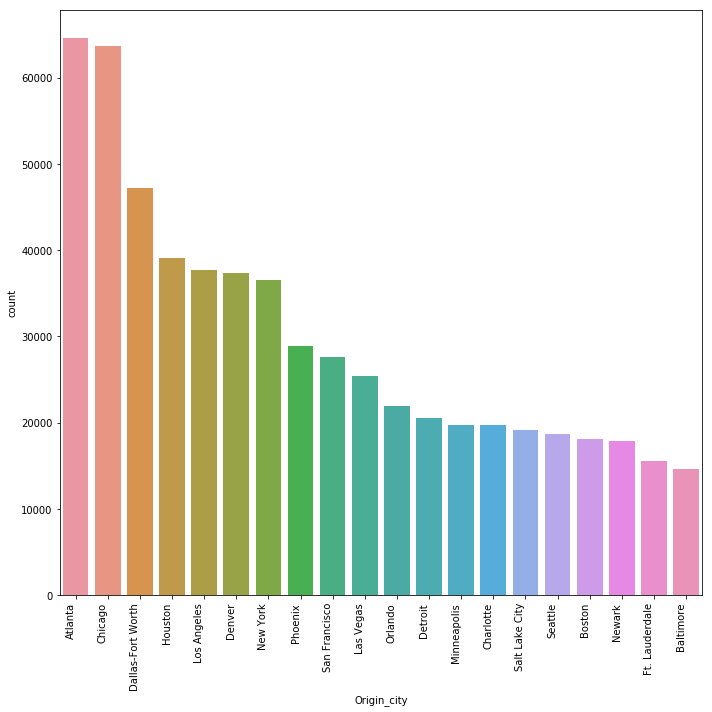

In [48]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=Flights['Origin_city'], data = Flights,
              order=Flights['Origin_city'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

# The Figure shows that Atlanta has the highest count of flight from origin city 

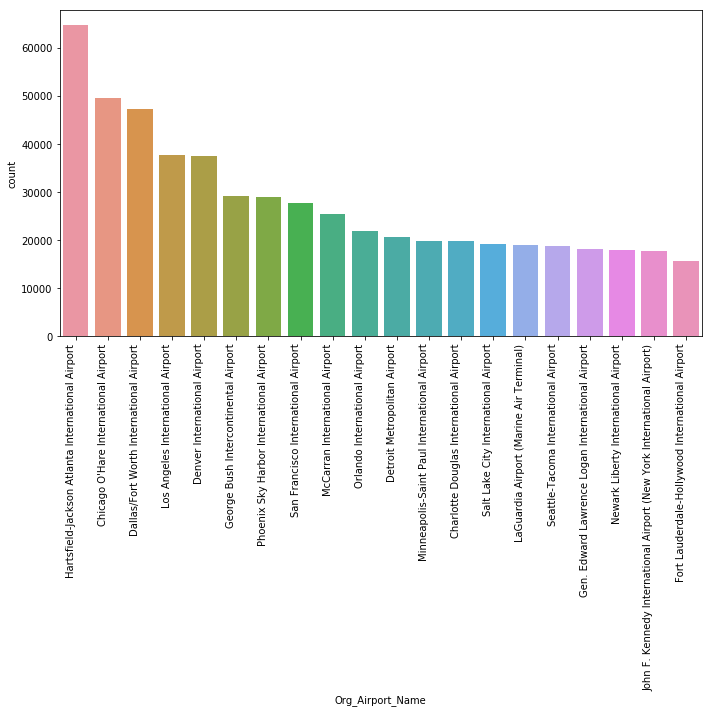

In [49]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=Flights['Org_Airport_Name'], data = Flights,
              order=Flights['Org_Airport_Name'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

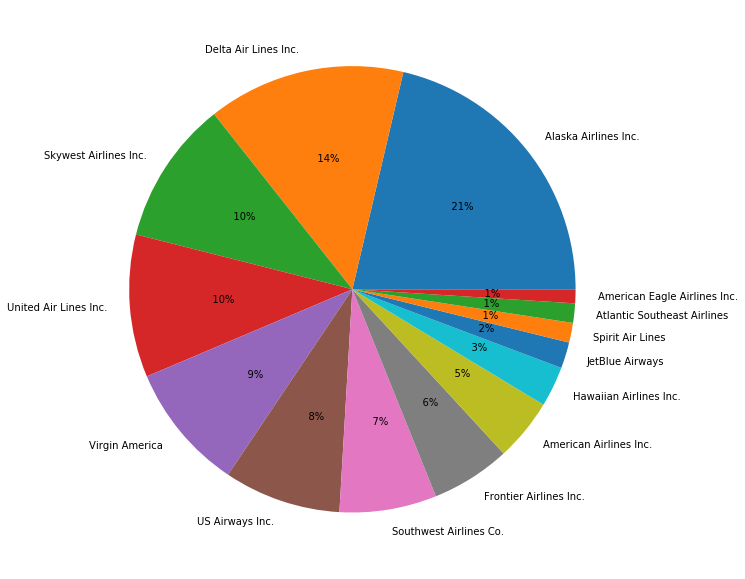

In [50]:
axis = plt.subplots(figsize=(10,14))
Name = Flights["AIRLINE"].unique()
size = Flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

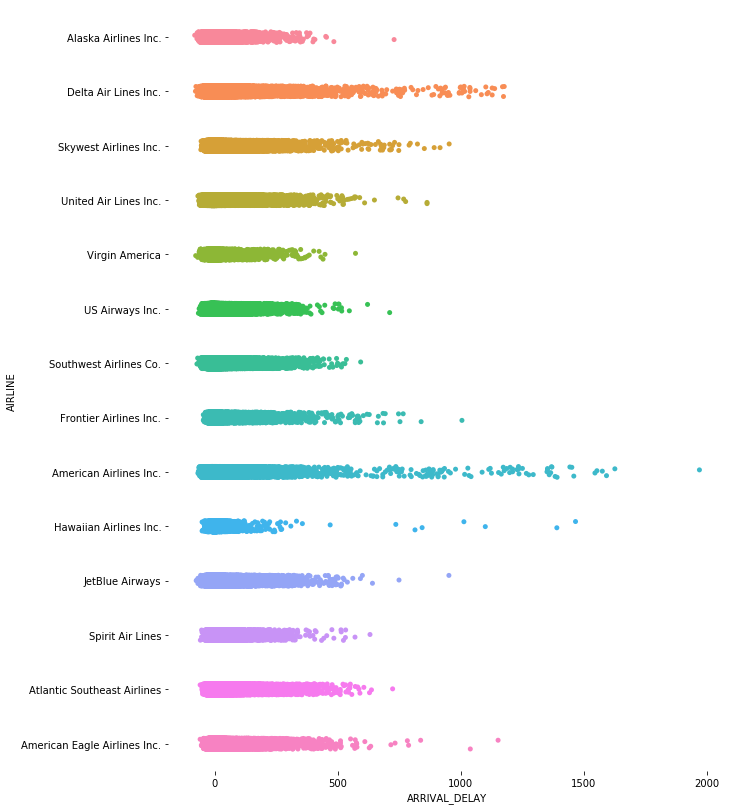

In [51]:
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data = Flights, dodge=True, jitter=True
            )
plt.show()

American Airlines Inc has the highest Arrival Delay.

In [52]:
%%html
<div class='tableauPlaceholder' id='viz1569936847474' style='position: relative'><noscript><a href='#'><img alt=' ' 
src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;9B&#47;9BD44NRJ9&#47;1_rss.png' style='border: none'
/></a></noscript><object class='tableauViz'  
style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' 
/> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;9BD44NRJ9' 
/> <param name='toolbar' value='yes' 
/><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;9B&#47;9BD44NRJ9&#47;1.png' 
/> <param name='animate_transition' value='yes'
/><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' 
/><param name='display_overlay' value='yes' /><param name='display_count' value='yes' 
/><param name='filter' value='publish=yes' /></object></div>                
<script type='text/javascript'>                    
var divElement = document.getElementById('viz1569936847474');                    
var vizElement = divElement.getElementsByTagName('object')[0];                    
vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);               
</script>

# Tableau Visualization to give more clear Insight and Inferences

[Text(0.5, 0, 'TAXI_TIME (TAXI_OUT: green, TAXI_IN: blue)')]

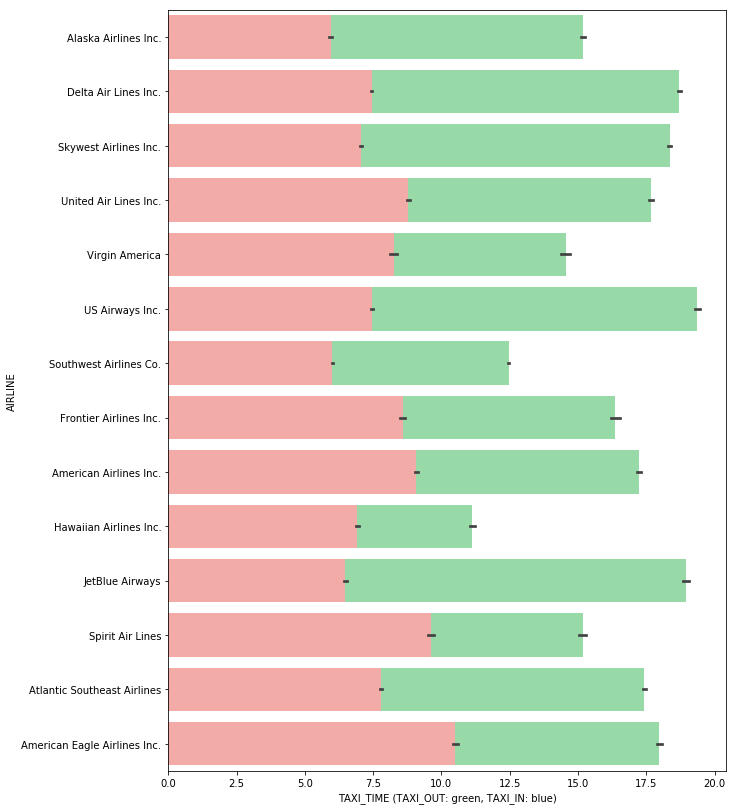

In [53]:
# Plot to show the Taxi In and Taxi Out Time
axis = plt.subplots(figsize=(10,14))
sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
axis = sns.barplot(x="TAXI_OUT", y="AIRLINE", data=Flights, color="g")
axis = sns.barplot(x="TAXI_IN", y="AIRLINE", data=Flights, color="r")
axis.set(xlabel="TAXI_TIME (TAXI_OUT: green, TAXI_IN: blue)")

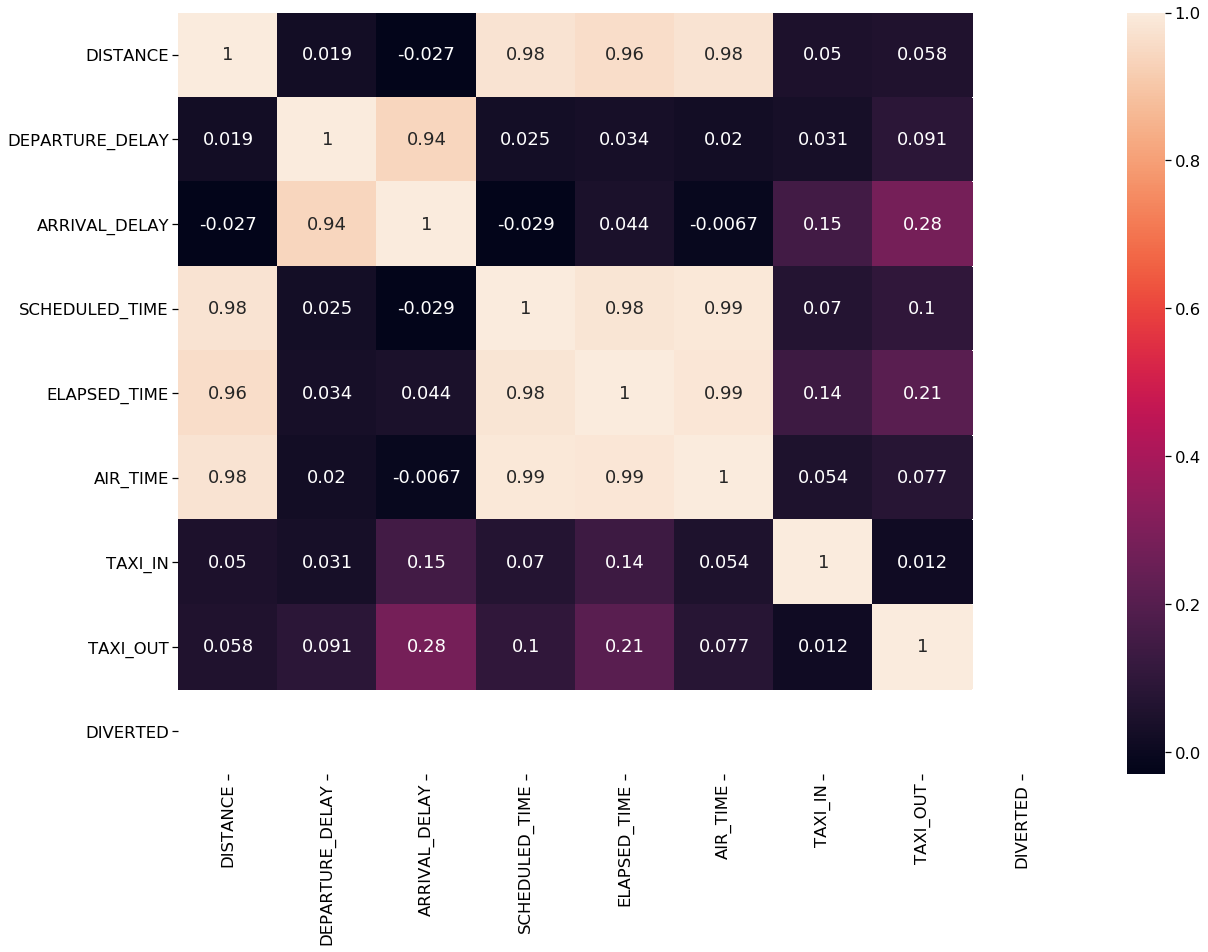

In [54]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(Flights.corr(),annot = True)
plt.show()

# Very High Correlation Between Arrival Delay and Departure Delay

It shows that maximum of the Arrival Delays are due to the Departure Delays but some flights has still arrived on time even after departed late from the Origin Airport. Now we need to check why departure Delay is happening in the origin Airport Which may be due to security Delays, Air System Delays etc.

In [55]:
%%html
<div class='tableauPlaceholder' id='viz1569938215526' style='position: relative'><noscript><a href='#'><img alt=' ' 
src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;PH&#47;PHNKQPSZG&#47;1_rss.png' style='border: none'
/></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' 
/> <param name='embed_code_version' value='3' 
/> <param name='path' value='shared&#47;PHNKQPSZG' 
/> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;PH&#47;PHNKQPSZG&#47;1.png' 
/> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes'
/><param name='display_overlay' value='yes' 
/><param name='display_count' value='yes' /></object></div>                
<script type='text/javascript'>                   
var divElement = document.getElementById('viz1569938215526');                   
var vizElement = divElement.getElementsByTagName('object')[0];                   
vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                   
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                   
vizElement.parentNode.insertBefore(scriptElement, vizElement);               
</script>

# Tableau Visualization to give more clear Insight and Inferences

# Prediction

In [56]:
Flights.head()

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,00:41:00,2015-01-01,...,-4.0,04:55:00,05:09:00,-14.0,204.0,194.0,173.0,4.0,17.0,0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,01:40:00,2015-01-01,...,-15.0,05:58:00,06:33:00,-35.0,218.0,198.0,170.0,11.0,17.0,0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,02:09:00,2015-01-01,...,-11.0,06:28:00,06:40:00,-12.0,200.0,199.0,176.0,8.0,15.0,0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,04:57:00,2015-01-01,...,-8.0,09:16:00,09:30:00,-14.0,205.0,199.0,179.0,4.0,16.0,0


In [57]:
# Dropping unncecssary columns before prediction
Flights1 = Flights.drop(['Org_Airport_Name','Origin_city','Dest_Airport_Name','Destination_city'],axis = 1)

In [58]:
Flights1.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE',
       'Actual_Departure', 'Date', 'Day', 'Scheduled_Departure',
       'DEPARTURE_DELAY', 'Actual_Arrival', 'Scheduled_Arrival',
       'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'TAXI_IN', 'TAXI_OUT', 'DIVERTED'],
      dtype='object')

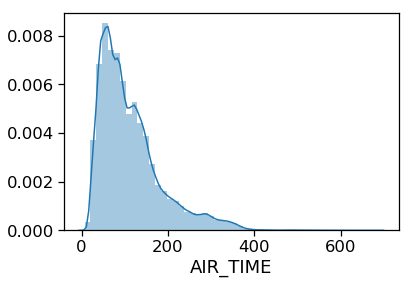

In [59]:
# To check the Distribution of Air Time
sns.distplot(Flights1['AIR_TIME'])
plt.show()

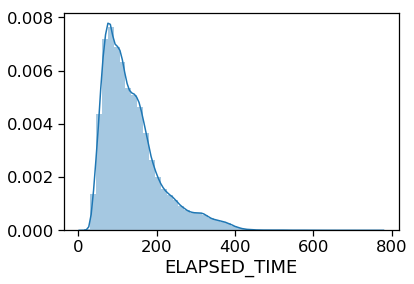

In [60]:
# To check the Distribution of Elapsed Time
sns.distplot(Flights1['ELAPSED_TIME'])
plt.show()

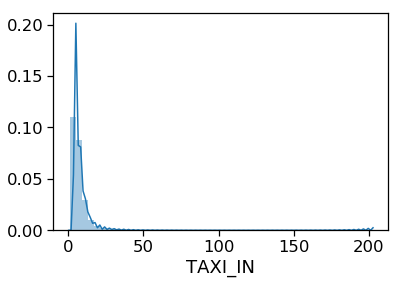

In [61]:
# To check the Distribution of Taxi IN
sns.distplot(Flights1['TAXI_IN'])
plt.show()

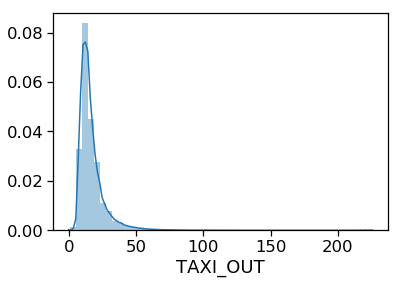

In [62]:
# To check the Distribution of Taxi out
sns.distplot(Flights1['TAXI_OUT'])
plt.show()

In [63]:
# importing Various regression algorithms 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [64]:
Las = Lasso()
LinR = LinearRegression()
Rid = Ridge()
Rfc = RandomForestRegressor(random_state=2)
Dtc = DecisionTreeRegressor(random_state = 2)
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=2)
Boost_las = AdaBoostRegressor(base_estimator=Las,random_state=2)
Boost_rid = AdaBoostRegressor(base_estimator=Rid,random_state=2)
Bg_Lin = BaggingRegressor(base_estimator=LinR,random_state=2)
Bg_las = BaggingRegressor(base_estimator=Las,random_state=2)
Bg_rid = BaggingRegressor(base_estimator=Rid,random_state=2)

In [65]:
le = LabelEncoder()

In [66]:
# Label encoding features to change categorical variables into numerical one
Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])
Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])
Flights1['Day'] = le.fit_transform(Flights1['Day'])

In [67]:
Flights1 = Flights1.drop(['Scheduled_Departure','Scheduled_Arrival','Actual_Arrival','Date','Actual_Departure'], axis = 1)

In [68]:
Flights1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003799 entries, 0 to 1004227
Data columns (total 13 columns):
AIRLINE                1003799 non-null int32
ORIGIN_AIRPORT         1003799 non-null int32
DESTINATION_AIRPORT    1003799 non-null int32
DISTANCE               1003799 non-null int64
Day                    1003799 non-null int32
DEPARTURE_DELAY        1003799 non-null float64
ARRIVAL_DELAY          1003799 non-null float64
SCHEDULED_TIME         1003799 non-null float64
ELAPSED_TIME           1003799 non-null float64
AIR_TIME               1003799 non-null float64
TAXI_IN                1003799 non-null float64
TAXI_OUT               1003799 non-null float64
DIVERTED               1003799 non-null int64
dtypes: float64(7), int32(4), int64(2)
memory usage: 91.9 MB


In [69]:
X = Flights1.drop('ARRIVAL_DELAY',axis = 1)
X.shape

(1003799, 12)

In [70]:
y = Flights1['ARRIVAL_DELAY']
y.head()

0   -22.0
1   -14.0
2   -35.0
3   -12.0
4   -14.0
Name: ARRIVAL_DELAY, dtype: float64

In [71]:
# Splitting into train and test data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [72]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

C:\Users\Abhishek Banerjee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek Banerjee\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Abhishek Banerjee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# Model fitting and results

In [73]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print()

Lasso
Mean Absolute Error: 7.57614884431211
Mean Squared Error: 103.28417652897132
Root Mean Squared Error: 10.162882294357802
R2 :  0.9397838629743293

Linear Regression
Mean Absolute Error: 8.677579549595116e-14
Mean Squared Error: 1.4315701066689725e-26
Root Mean Squared Error: 1.196482388783459e-13
R2 :  1.0

Ridge
Mean Absolute Error: 0.0008784888969013381
Mean Squared Error: 1.3574750511052419e-06
Root Mean Squared Error: 0.0011651073131283838
R2 :  0.9999999992085729

Random forest Regressor
Mean Absolute Error: 2.1500132828584713
Mean Squared Error: 22.997532709038985
Root Mean Squared Error: 4.795574283549259
R2 :  0.986592112873443



C:\Users\Abhishek Banerjee\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Decision Tree Regressor
Mean Absolute Error: 1.3994231918708906
Mean Squared Error: 11.310688815833169
Root Mean Squared Error: 3.3631367524727818
R2 :  0.9934057083042349

Boosted Linear
Mean Absolute Error: 2.799100114724391e-13
Mean Squared Error: 1.278997274772311e-25
Root Mean Squared Error: 3.576307138337409e-13
R2 :  1.0

Boosted Lasso
Mean Absolute Error: 3.4658277917729956
Mean Squared Error: 21.6524529117494
Root Mean Squared Error: 4.653219628574327
R2 :  0.987376313436453

Boosted Ridge
Mean Absolute Error: 0.0003493677637477693
Mean Squared Error: 2.1472740125672633e-07
Root Mean Squared Error: 0.0004633868807559471
R2 :  0.9999999998748109

Bagged Linear
Mean Absolute Error: 6.980217928242196e-14
Mean Squared Error: 9.829453608389999e-27
Root Mean Squared Error: 9.914360094524507e-14
R2 :  1.0

Bagged Lasso
Mean Absolute Error: 7.576520328143206
Mean Squared Error: 103.30907764951166
Root Mean Squared Error: 10.164107321821806
R2 :  0.9397693452685495

Bagged Ridge
Mean A

# Model Analysis

Lasso


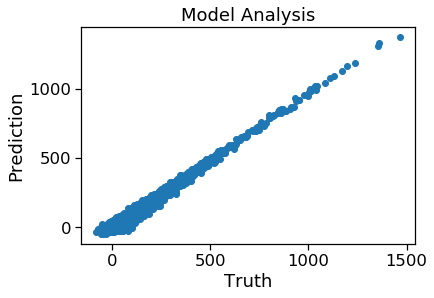

Linear Regression


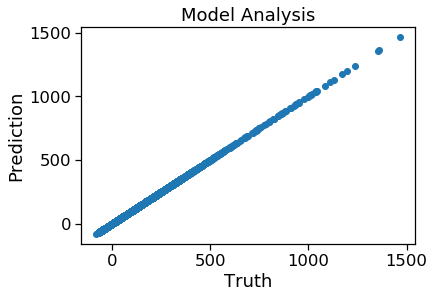

Ridge


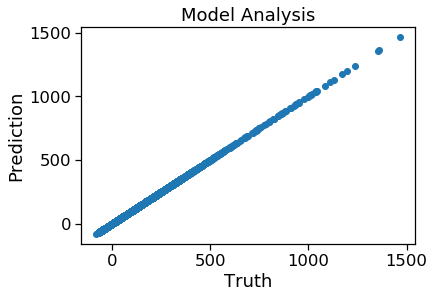

Random forest Regressor


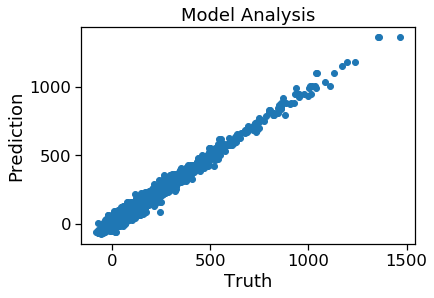

Decision Tree Regressor


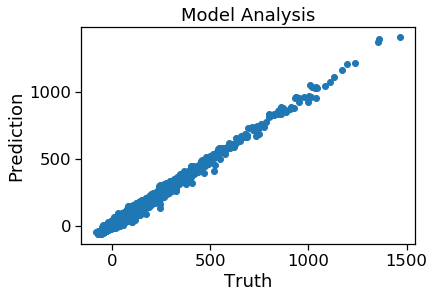

Boosted Linear


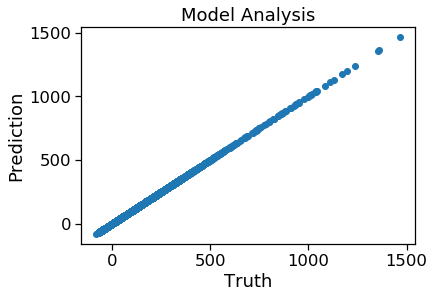

Boosted Lasso


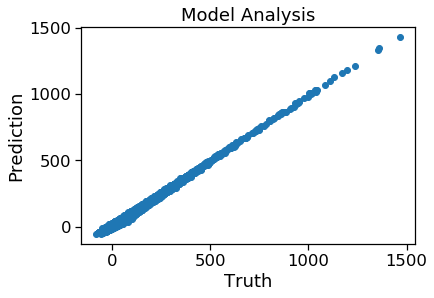

Boosted Ridge


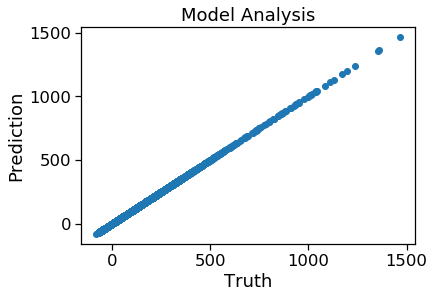

Bagged Linear


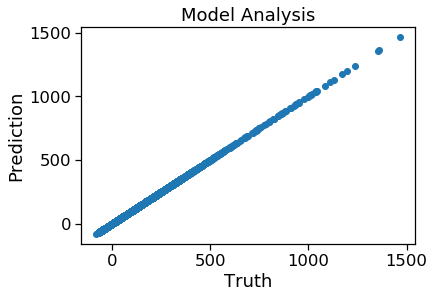

Bagged Lasso


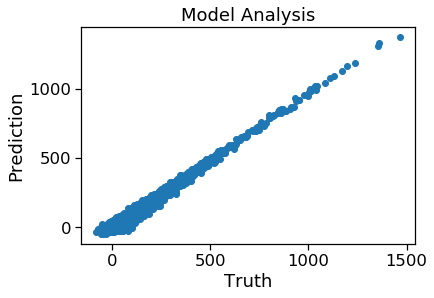

Bagged Ridge


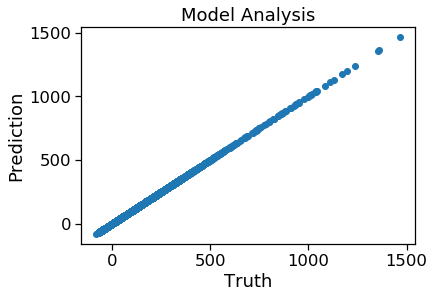

In [74]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    plt.scatter(y_test, Y_predict)
    plt.title("Model Analysis")
    plt.xlabel("Truth")
    plt.ylabel("Prediction")
    plt.show()

# When Flight_Delays is taken, where I took all the different Delays into Concern.

I removed the null values present in all the different types of Delays and proceeded with prediction of the Arrival Delays. 

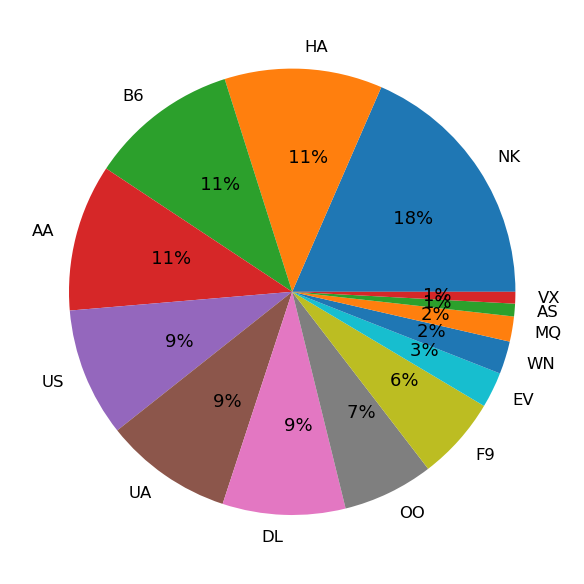

In [75]:
axis = plt.subplots(figsize=(10,14))
Name = Flight_Delays["AIRLINE"].unique()
size = Flight_Delays["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

In [76]:
Flight_Delays['AIRLINE']= le.fit_transform(Flight_Delays['AIRLINE'])
Flight_Delays['ORIGIN_AIRPORT'] = le.fit_transform(Flight_Delays['ORIGIN_AIRPORT'])
Flight_Delays['DESTINATION_AIRPORT'] = le.fit_transform(Flight_Delays['DESTINATION_AIRPORT'])

In [77]:
X = Flight_Delays.drop('ARRIVAL_DELAY',axis = 1)
X.shape
y = Flight_Delays['ARRIVAL_DELAY']
y.head()

27    25.0
30    43.0
35    15.0
50    20.0
52    85.0
Name: ARRIVAL_DELAY, dtype: float64

In [78]:
# Splitting the Data into Training and Testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [79]:
# Scalling of the Data
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

C:\Users\Abhishek Banerjee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek Banerjee\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Abhishek Banerjee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


# Model fitting and results

In [80]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print()

Lasso
Mean Absolute Error: 3.975366518562225
Mean Squared Error: 30.17736466525363
Root Mean Squared Error: 5.493392819128597
R2 :  0.992507526163796

Linear Regression
Mean Absolute Error: 9.55167948152007e-14
Mean Squared Error: 1.7162516167952476e-26
Root Mean Squared Error: 1.3100578677277e-13
R2 :  1.0

Ridge
Mean Absolute Error: 0.002525229650562746
Mean Squared Error: 1.1051567946159222e-05
Root Mean Squared Error: 0.003324389860735233
R2 :  0.9999999972561029

Random forest Regressor
Mean Absolute Error: 1.3826631076882685
Mean Squared Error: 22.415758689595823
Root Mean Squared Error: 4.734528349222953
R2 :  0.994434587401403

Decision Tree Regressor
Mean Absolute Error: 1.1058956519202439
Mean Squared Error: 12.181003952799779
Root Mean Squared Error: 3.4901295037290203
R2 :  0.9969756851061241

Boosted Linear
Mean Absolute Error: 1.2167993825586565e-13
Mean Squared Error: 1.9618140486767487e-26
Root Mean Squared Error: 1.4006477246890986e-13
R2 :  1.0

Boosted Lasso
Mean Abs

# Model Analysis

Lasso


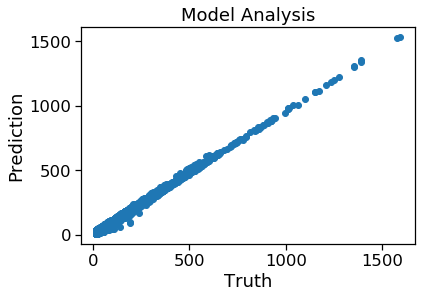

Linear Regression


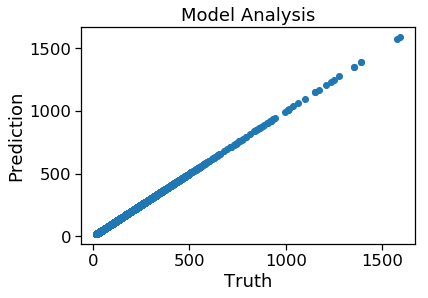

Ridge


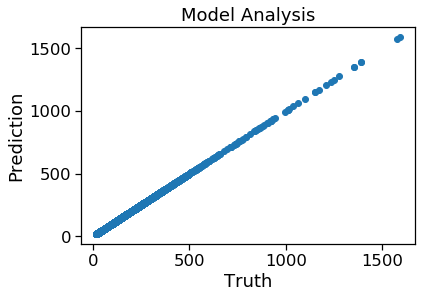

Random forest Regressor


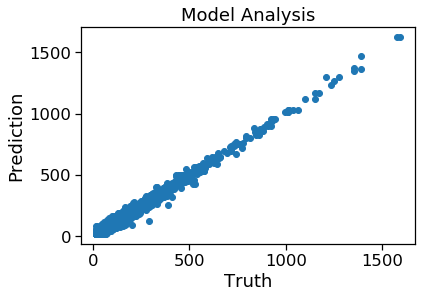

Decision Tree Regressor


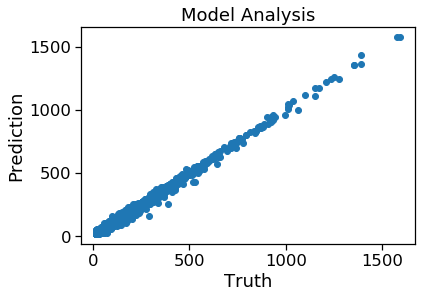

Boosted Linear


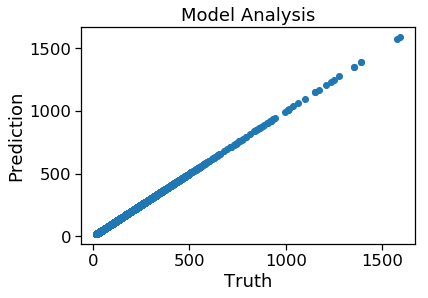

Boosted Lasso


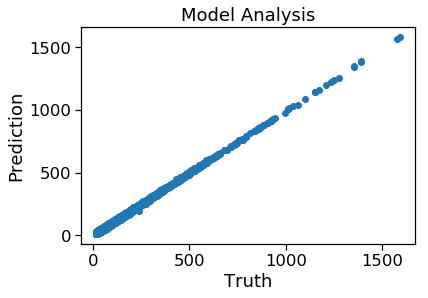

Boosted Ridge


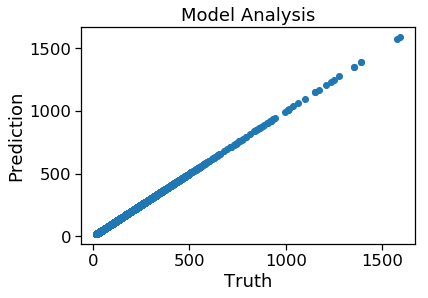

Bagged Linear


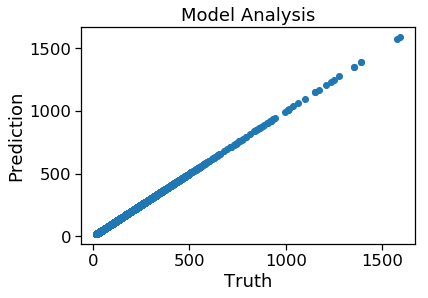

Bagged Lasso


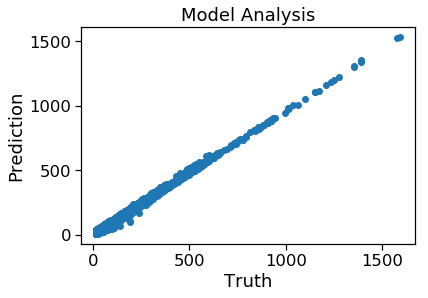

Bagged Ridge


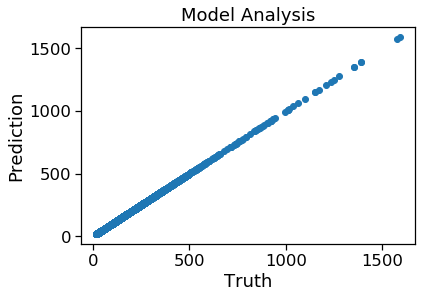

In [81]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    plt.scatter(y_test, Y_predict)
    plt.title("Model Analysis")
    plt.xlabel("Truth")
    plt.ylabel("Prediction")
    plt.show()

# Conclusion

We can see that maximum arrival Delays are dependent on the Departure Delays of the Airport. The first part is dealt with cleaning and exploration of the data set to get more insights and the second part dealt with the sitting of the model to predict the delays. For exploratory Analysis I used visualization tools like tableau and seaborn as well as matplotlib. The Second part dealt with the model fitting and predicting the Arrival delays of the airlines.

We can see that departure delay is the main problem which is creating Delay in the aviation industry. Departure Delays can be caused due Security Delay, Airline System Delays, Airlines Delay etc. The Delays affect the revenue of the company to a great extent so the delays has to be reduced as much as possible so as to increase the profitability in the Airline Industry. Customer Satisfaction will also be greatly enhanced if the delays can be brought down as low as possible.